### Setup:

###### Get the unannotated data from scratch:
```bash
cd general/misc
ddp_leech_googlesheets -root_dir ./ -sheet_ids_gids_names '1BI1vPi0EIwYP2Vih3LG8TpqR2wOgaoEIgx9qGWuuHr4,0,1000_Charters'
```

###### Or get the unannotated data cached:
```bash
scp 143.50.30.63:/data/anguelos/monasterium/tmp/data/leech/1000_charters.zip /tmp
(cd general/misc && unzip /tmp/1000_charters.zip)
```

### Syncing work:
Don't forget to pull before working!

```cmd
cd ../general
git pull
```

### Annotate:

A simple way to chunc the images is to use all charters starting with 0, 1, ..., "f" . Each one of these will giveyou ~ 1/16 of the charters

```bash
(cd general/misc && frat -default_config diplomatics -images 1000_Charters/*/*/0*/*.j*pg)
```
And open [http://127.0.0.1:8080]

### Saving work:
Don't forget to push into git periodically!

```cmd
git add 1000_Charters/*/*/*/*.json
git commit -m 'A very short description or comment'
git push
```


In [1]:
import glob
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from collections import defaultdict

In [2]:
%time charters = glob.glob("./*/*/*/url.txt")

charters = glob.glob("./*/*/*/url.txt")

jpegs = glob.glob("./*/*/*/*.jpg") + glob.glob("./*/*/*/*.jpeg")
pngs = glob.glob("./*/*/*/*.png")
tiffs = glob.glob("./*/*/*/*.tiff") + glob.glob("./*/*/*/*.tif")
images = jpegs + pngs + tiffs

groundtruth = glob.glob("./*/*/*/*jpg.json")

CPU times: user 9.46 ms, sys: 8.54 ms, total: 18 ms
Wall time: 16.7 ms


In [3]:
paths2struct = lambda x : [tuple(f.split("/")) for f in x]
level = lambda x, depth : sorted(list(set([item[:depth] for item in paths2struct(x)])))


def count_level_per_level(files, parent_level, decendant_level):
    files_as_tuples= paths2struct(files)
    result=defaultdict(lambda:[])
    for file in files_as_tuples:
        result[file[:parent_level]].append(file[:decendant_level])
    return {k:[len(set(v))] for k, v in result.items()}

In [4]:
filetypes = set([f.split(".")[-1] for f in glob.glob("./*/*/*/*.*")])
print(filetypes)

{'xml', 'png', 'html', 'json', 'txt', 'jpeg', 'jpg', 'marker'}


In [5]:
pd.set_option('display.max_columns', 500)
pd.DataFrame(count_level_per_level(images, 2, 4))

.                                                        \
  AT-StiAHe AT-StiAGe DE-StaASpeyer AT-ADG AT-StiAR HU-VFL DE-BAH   
0         5         1             5      1        4      2      1   

                                                                        \
  EE-Rahvusarhiiv AT-StAHorn AT-AWMK AT-DAW AT-StiAG AT-NOeLA AT-StiAM   
0               3          1       1      5        5       10        4   

                                                                      \
  AT-OOeLA AT-StiAStP ES-AHN AT-StiAK AT-StiAAdm EE-TLA AT-StiAStams   
0        9          3      6        1          3      2            5   

                                                                               \
  DE-BayHStA AT-WStLA CZ-DABB DE-AVBautzen AT-StaAB AT-DAGS AT-StiALi AT-DOZA   
0         76       18       2           16        2       4         1      21   

                                                                         \
  AT-StiAWilten AT-DASP DE-GAUnivGoet CH-StiASG DE-LHAKO DE-UAHD CZ-MZA   
0             3       1             5        11        4       6      5   

                                                                          \
  IT-BST EE-AM CZ-NA CH-KAE DE-StaAWuerzburg IT-ASNA AT-StiASch AT-StiAL   
0      2     1    42      1                4       3          1        8   

                                                                          \
  COLLECTIONS DE-StaAMainz DE-HStAMa DE-UBHD CZ-KAVB CH-StaASG DE-StaAWo   
0          17            1        39       2       1         3         3   

                                                                           \
  SI-PAM SK-AMB AT-HHStA DE-StAN AT-StiASP AT-StiAA AT-StiAKr AT-StiARein   
0      4      9       42       5         6        1         1           3   

                                                                            \
  AT-StaAR IT-BSNSP SK-SNA DE-UAM CZ-SOAT DE-StadtAFulda AT-StiASei DE-ABP   
0        2        8     10      1       5              1          1      3   

                                                                         \
  DE-AKR AT-VLA ES-ACC CZ-APH AT-StaLois AT-StiAZ IT-ASDRCB AT-StiASchl   
0      1     27      1      3          2        3         2           1   

                                                                           \
  AT-StiAH CZ-SOAP DE-HLBFulda AT-StaAZ AT-StiASF AT-StiAMB AT-KLA AT-AES   
0        4       3           2        1         2         8     28      6   

                                     
  AT-SLA DE-StASGD SI-NSAL DE-StALB  
0      8         4       1        2

In [6]:
#%timeit data_cardinalities = pd.DataFrame({"Set":["All Charters", "Image Charters", "Annotated Images"],"archives": [len(level(charters,2)),len(level(images,2)),len(level(groundtruth,2))],"fonds": [len(level(charters,3)),len(level(images,3)), len(level(groundtruth,3))],"charters": [len(level(charters,4)), len(level(images,4)), len(level(groundtruth, 4))],"images": ["-", len(level(images,5)), len(level(groundtruth, 5))],})

data_cardinalities = pd.DataFrame({
"Set":["All Charters", "Image Charters", "Annotated Images"],
"archives": [len(level(charters,2)),len(level(images,2)),len(level(groundtruth,2))],
"fonds": [len(level(charters,3)),len(level(images,3)), len(level(groundtruth,3))],
"charters": [len(level(charters,4)), len(level(images,4)), len(level(groundtruth, 4))],
"images": ["-", len(level(images,5)), len(level(groundtruth, 5))],
})

data_cardinalities

,Set,archives,fonds,charters,images
0,All Charters,97,315,1000,-
1,Image Charters,87,210,591,1482
2,Annotated Images,23,28,34,73


In [7]:
annotations = []
groundtruth_paths = glob.glob("./*/*/*/*.json")
for groundtruth in groundtruth_paths:
    annotations.append(json.load(open(groundtruth,"r")))

seal_id = annotations[-1]["class_names"].index("Img:Seal")  # any annotation will do
calibration_id = annotations[-1]["class_names"].index("Img:CalibrationCard")  # any annotation will do

per_image = {
"Seals": np.array([len([box for box in a["rect_classes"] if box==seal_id]) for a in annotations]),
"Calibrations": np.array([len([box for box in a["rect_classes"] if box==calibration_id]) for a in annotations]),
"Widths": np.array([int(a["image_wh"][0]) for a in annotations]),
"Heights": np.array([int(a["image_wh"][1]) for a in annotations]),
"MP":np.array([(int(a["image_wh"][1])*int(a["image_wh"][0]))/1000000. for a in annotations]),
"Path": np.array(groundtruth_paths)
}
per_image = pd.DataFrame(per_image)

per_image.mean(numeric_only = True)

Seals              0.780822
Calibrations       0.986301
Widths          3555.808219
Heights         2763.589041
MP                10.985583
dtype: float64

<AxesSubplot:>

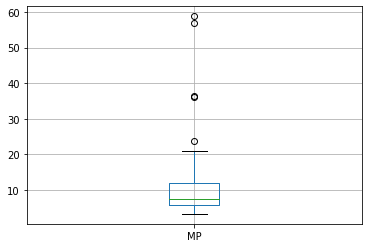

In [8]:
per_image.boxplot(column=['MP']) 

In [9]:
pd.set_option("display.max_rows", None)

pd.set_option('max_colwidth', 500)
per_image.loc['mean'] = per_image.mean()

per_image

/tmp/ipykernel_476218/2735770465.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  per_image.loc['mean'] = per_image.mean()


,Seals,Calibrations,Widths,Heights,MP,Path
0,0.000000,1.000000,3000.000000,3580.000000,10.740000,./HU-VFL/KO/03389a0b9df91d0481ffe5848215bd1e/333670d2fe0c2b3636507423da79618c.jpg.json
1,0.000000,1.000000,3000.000000,2546.000000,7.638000,./HU-VFL/KO/03389a0b9df91d0481ffe5848215bd1e/030fef7b865356f61843c714b36519de.jpg.json
2,2.000000,1.000000,5438.000000,3702.000000,20.131476,./AT-NOeLA/HA_Seefeld-HardeggerUrk/0b4c75bd755dcb6955ffcc77b8e27ca7/1aa9a95d2f0a96c0c01ca5a79d7206ae.jpg.json
3,2.000000,1.000000,5570.000000,3746.000000,20.865220,./AT-NOeLA/HA_Seefeld-HardeggerUrk/0b4c75bd755dcb6955ffcc77b8e27ca7/99f6f6658f21c19b7b05021dfe43ddfe.jpg.json
4,2.000000,1.000000,3000.000000,2156.000000,6.468000,./AT-OOeLA/GarstenOSB/0b3d0e5a77708a4435d2457af2ee7973/87625f0468f23e5afba3139c90914f81.jpg.json
5,2.000000,1.000000,3000.000000,2056.000000,6.168000,./AT-OOeLA/GarstenOSB/0b3d0e5a77708a4435d2457af2ee7973/8b7cab6e235ee9961040d1999bdac429.jpg.json
6,1.000000,1.000000,3000.000000,4170.000000,12.510000,./AT-StiAK/KlosterneuburgCanReg/0f3cd7a8c68ddc79cdbea070c51cbb2b/a97e19943463c696ce13ba5ba6f38070.jpg.json
7,1.000000,1.000000,3000.000000,2496.000000,7.488000,./DE-BayHStA/KUAltenhohenau/08244b72ad58eef9bb3863ee14474e36/d4c28f985d1c5d3eaf18286d682e081d.jpg.json
8,1.000000,1.000000,3000.000000,2458.000000,7.374000,./DE-BayHStA/KUAltenhohenau/08244b72ad58eef9bb3863ee14474e36/f9dbb18eec4373690cfdf7ad8aabeb27.jpg.json
9,1.000000,1.000000,3000.000000,1896.000000,5.688000,./DE-BayHStA/KUPassauNiedernburg/0a30a392e83136d75f61525e5678683b/dbfd50f755771635638116d0cb128780.jpg.json
